<img style="float: left; padding-right: 20px; width: 700px" src="https://www.businesscol.com/wp-content/uploads/2023/02/seguros-bolivar-logo.png">

**Seguros Bolivar**<br>
**Proyecto: Digital Factory - IA para potenciar el Ciclo de Desarrollo de Software**<br>
**Sección: 6. Soporte y monitoreo**<br>
**Notebook: Modelos de Clasificación de Casos de Jiras**<br>
**Responsables:**<br>
                VLADIMIR EFREN RECALDE ACHINTE<br>
                MIGUEL ANGEL MORA MIRANDA<br>
                REINEL GAMBOA LOPEZ<br>
                EDILBERTO ELIAS CONTRERAS SIERRA<br>
                
# NOTEBOOK 2: MODELOS DE CLASIFICACIÓN DE CASOS DE JIRAS

### **Introducción**

En este notebook se desarrolla un modelo para la clasificación de casos de JIRA en el sistema de Seguros Bolívar. El objetivo principal es optimizar la asignación de casos mediante la clasificación automática basada en los datos proporcionados.

El enfoque utilizado combina técnicas de procesamiento de lenguaje natural (NLP) y algoritmos de aprendizaje supervisado. La idea es evaluar múltiples modelos y seleccionar los más adecuados basados en métricas de desempeño, con la posibilidad de ajustar hiperparámetros para obtener resultados óptimos.

### **Objetivos del Proyecto**
- **Clasificación precisa**: Identificar correctamente el "Centro de Desarrollo" y "Grupo de Asignación" para cada caso.
- **Optimización del flujo de trabajo**: Reducir el tiempo y los errores en la asignación manual de casos.
- **Automatización**: Diseñar un modelo que pueda ser implementado fácilmente en producción y mejorar la gestión de incidencias.

### **Plan de Trabajo**
1. **Exploración y Preprocesamiento**: Inspeccionar, limpiar y preparar los datos.
2. **Procesamiento de Texto**: Aplicar técnicas de NLP a la columna Texto_Descripcion para extraer información clave.
3. **Configuración del Modelo**: Seleccionar características relevantes y configurar algoritmos de aprendizaje supervisado.
4. **Entrenamiento y Evaluación**: Probar múltiples modelos, realizar validación cruzada y ajustar hiperparámetros.
5. **Evaluación Final**: Seleccionar el mejor modelo y validar su desempeño en un conjunto de prueba.
6. **Producción**: Guardar el modelo final para su uso en un sistema de producción.

## 1. Carga y Exploración Detallada de Datos
En este capítulo, realizaremos una carga, exploración y análisis inicial de los datos con el fin de identificar problemas en la estructura, valores faltantes y características relevantes para el análisis.

### 1.1 Carga de los datos

La primera etapa consiste en cargar los datos de entrenamiento y prueba desde archivos CSV. Estos datos contienen información detallada sobre los casos, incluyendo características como Aplicacion_Afectada, Texto_Descripcion, Urgencia, entre otros.

**Acciones en esta sección:**
- Importar los datos desde los archivos CSV proporcionados.
- Inspeccionar la estructura de los datos para asegurarse de que están correctamente formateados.
- Visualizar las primeras filas para comprender el contenido y las posibles transformaciones necesarias.

In [ ]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

In [ ]:
# Librerías necesarias para procesamiento de texto
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import re

# Descargar stopwords si es necesario
nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edilb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Rutas de los archivos
train_path = '../../Data/Raw/JIRA_Train_Data.csv'
test_path = '../../Data/Raw/JIRA_Test_Data.csv'

# Cargar datasets
data_train = pd.read_csv(train_path, sep=';', encoding='utf-8-sig')
data_test = pd.read_csv(test_path, sep=';', encoding='utf-8-sig')

# Mostrar las primeras filas de los datasets
print("\nPrimeras filas del dataset de entrenamiento:")
display(data_train.head())

print("\nPrimeras filas del dataset de prueba:")
display(data_test.head())


Primeras filas del dataset de entrenamiento:


,Nombres,Apellidos,Documento_ID,Correo_Electronico,Direccion,Telefono_Contacto,Tipo_Aplicacion,Aplicacion_Afectada,Cantidad_Usuarios_Afectados,Ultima_Actividad,...,URL_Ingreso,Texto_Descripcion,Urgencia,Impacto,Ambiente,Incidente_Reabierto,Tiempo_Resolucion,Centro_Desarrollo,Grupo_Asignacion,Target
0,Adelardo,Pou,1246311409,adelardo.pou@segurosbolivar.com,"Vial de Santos Tejada 79\nCastellón, 03513",+34740133600,DESKTOP,PORTALES ARL,4,2024-05-03,...,https://ventas.segurosbolivar.com,El módulo contable presenta discrepancias en l...,Alta,Medio,Desarrollo,No,19.75,Sistemas Contables,Atención al Cliente,Sistemas Contables - Atención al Cliente
1,Jose Miguel,Soto,5060228774,jose miguel.soto@segurosbolivar.com,Avenida de José Antonio Fortuny 16 Apt. 96 \nC...,+34986 56 94 37,APP_WEB,GESTIÓN CLIENTES,4,2024-02-09,...,https://clientes.segurosbolivar.com/login,Los usuarios enfrentan inconvenientes al carga...,Media,Alto,Desarrollo,Sí,16.40,Gestión de Clientes,Fábrica Desarrollo Core,Gestión de Clientes - Fábrica Desarrollo Core
2,Adela,Sandoval,2251753746,adela.sandoval@segurosbolivar.com,"Pasadizo Ignacio Soriano 9\nLas Palmas, 81900",+34 912039728,APP_WEB,GESTIÓN CLIENTES,9,2024-08-27,...,https://portal.segurosbolivar.com,El módulo contable presenta discrepancias en l...,Media,Alto,QA,Sí,10.90,Sistemas Contables,Atención al Cliente,Sistemas Contables - Atención al Cliente
3,Anselmo,Cisneros,3882823749,anselmo.cisneros@segurosbolivar.com,"Callejón María Girón 7 Piso 7 \nGranada, 51497",+34730 72 40 23,DESKTOP,PORTALES ARL,6,2024-01-31,...,https://ventas.segurosbolivar.com,Los usuarios enfrentan inconvenientes al carga...,Baja,Alto,QA,No,11.60,Gestión de Clientes,Fábrica Desarrollo Core,Gestión de Clientes - Fábrica Desarrollo Core
4,Etelvina,Juan,3526961008,etelvina.juan@segurosbolivar.com,"Acceso Aurelia Bas 61 Piso 6 \nCádiz, 78262",+34 649 80 00 87,APP_WEB,VENTAS ONLINE,5,2024-06-05,...,https://clientes.segurosbolivar.com/login,Los usuarios enfrentan inconvenientes al carga...,Alta,Medio,Producción,No,27.31,Gestión de Clientes,Atención al Cliente,Gestión de Clientes - Atención al Cliente



Primeras filas del dataset de prueba:


,Nombres,Apellidos,Documento_ID,Correo_Electronico,Direccion,Telefono_Contacto,Tipo_Aplicacion,Aplicacion_Afectada,Cantidad_Usuarios_Afectados,Ultima_Actividad,...,URL_Ingreso,Texto_Descripcion,Urgencia,Impacto,Ambiente,Incidente_Reabierto,Tiempo_Resolucion,Centro_Desarrollo,Grupo_Asignacion,Target
0,Dimas,Portero,6137334251,dimas.portero@segurosbolivar.com,"Cañada de Gerardo Nebot 425\nLas Palmas, 47617",+34916 62 30 42,APP_WEB,SISTEMA CONTABLE,4,2024-10-16,...,https://clientes.segurosbolivar.com/login,Se han detectado problemas de acceso y tiempos...,Media,Alto,Desarrollo,Sí,11.24,Plataformas Online,Infraestructura TI,Plataformas Online - Infraestructura TI
1,Amancio,Romeu,6928625485,amancio.romeu@segurosbolivar.com,"Pasadizo de Hilda Menéndez 749\nValladolid, 77644",+34 733 949 393,DESKTOP,SISTEMA CONTABLE,3,2024-03-17,...,https://portal.segurosbolivar.com,El módulo contable presenta discrepancias en l...,Baja,Medio,QA,No,11.30,Sistemas Contables,Atención al Cliente,Sistemas Contables - Atención al Cliente
2,Angelita,Andrés,4802957017,angelita.andrés@segurosbolivar.com,"Camino Julie Rivera 86 Piso 1 \nLugo, 61740",+34 714 510 681,APP_MÓVIL,VENTAS ONLINE,4,2024-11-18,...,https://ventas.segurosbolivar.com,El módulo contable presenta discrepancias en l...,Baja,Medio,QA,Sí,3.28,Sistemas Contables,Infraestructura TI,Sistemas Contables - Infraestructura TI
3,Áurea,Oliver,5984549148,áurea.oliver@segurosbolivar.com,"Glorieta Norberto Galvez 504\nPontevedra, 38033",+34722 463 053,APP_MÓVIL,SISTEMA CONTABLE,3,2024-06-07,...,https://clientes.segurosbolivar.com/login,El módulo contable presenta discrepancias en l...,Media,Bajo,Desarrollo,No,1.87,Sistemas Contables,Infraestructura TI,Sistemas Contables - Infraestructura TI
4,Quique,Uriarte,6112668808,quique.uriarte@segurosbolivar.com,Pasadizo de Marta Carretero 340 Apt. 91 \nCast...,+34 698 45 75 88,APP_WEB,PORTALES ARL,4,2024-08-27,...,https://clientes.segurosbolivar.com/login,Se han detectado problemas de acceso y tiempos...,Media,Bajo,Desarrollo,Sí,18.81,Plataformas Online,Fábrica Desarrollo Core,Plataformas Online - Fábrica Desarrollo Core


### 1.2 Exploración inicial de los datos

Incluimos la inspección de los datos para obtener un panorama general sobre su estructura y calidad. Esto nos permitirá identificar posibles problemas, como valores faltantes o anomalías en las columnas.

In [ ]:
# Información general sobre las columnas y tipos de datos de entrenamiento
print("\nInformación del dataset de entrenamiento:")
data_train.info()


Información del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nombres                      10000 non-null  object 
 1   Apellidos                    10000 non-null  object 
 2   Documento_ID                 10000 non-null  int64  
 3   Correo_Electronico           10000 non-null  object 
 4   Direccion                    10000 non-null  object 
 5   Telefono_Contacto            10000 non-null  object 
 6   Tipo_Aplicacion              10000 non-null  object 
 7   Aplicacion_Afectada          10000 non-null  object 
 8   Cantidad_Usuarios_Afectados  10000 non-null  int64  
 9   Ultima_Actividad             10000 non-null  object 
 10  Usuario_Compañero            10000 non-null  object 
 11  Cambio_Contrato              10000 non-null  object 
 12  Error_Reportado              100

In [ ]:
# Información general sobre las columnas y tipos de datos de prueba
print("\nInformación del dataset de prueba:")
data_test.info()


Información del dataset de prueba:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nombres                      4000 non-null   object 
 1   Apellidos                    4000 non-null   object 
 2   Documento_ID                 4000 non-null   int64  
 3   Correo_Electronico           4000 non-null   object 
 4   Direccion                    4000 non-null   object 
 5   Telefono_Contacto            4000 non-null   object 
 6   Tipo_Aplicacion              4000 non-null   object 
 7   Aplicacion_Afectada          4000 non-null   object 
 8   Cantidad_Usuarios_Afectados  4000 non-null   int64  
 9   Ultima_Actividad             4000 non-null   object 
 10  Usuario_Compañero            4000 non-null   object 
 11  Cambio_Contrato              4000 non-null   object 
 12  Error_Reportado              4000 non-nu

In [ ]:
# Resumen estadístico de los datos numéricos
print("\nResumen estadístico del dataset de entrenamiento:")
display(data_train.describe())


Resumen estadístico del dataset de entrenamiento:


,Documento_ID,Cantidad_Usuarios_Afectados,Tiempo_Resolucion
count,1.000000e+04,10000.000000,10000.000000
mean,5.510737e+09,5.518000,15.471996
std,2.601085e+09,2.863756,8.335305
min,1.000303e+09,1.000000,1.000000
25%,3.246748e+09,3.000000,8.280000
50%,5.544827e+09,6.000000,15.460000
75%,7.781626e+09,8.000000,22.700000
max,9.998667e+09,10.000000,30.000000


### 1.3 Visualización de distribuciones

Algunas variables clave como Urgencia, Impacto, y Cantidad_Usuarios_Afectados serán visualizadas para obtener más información.

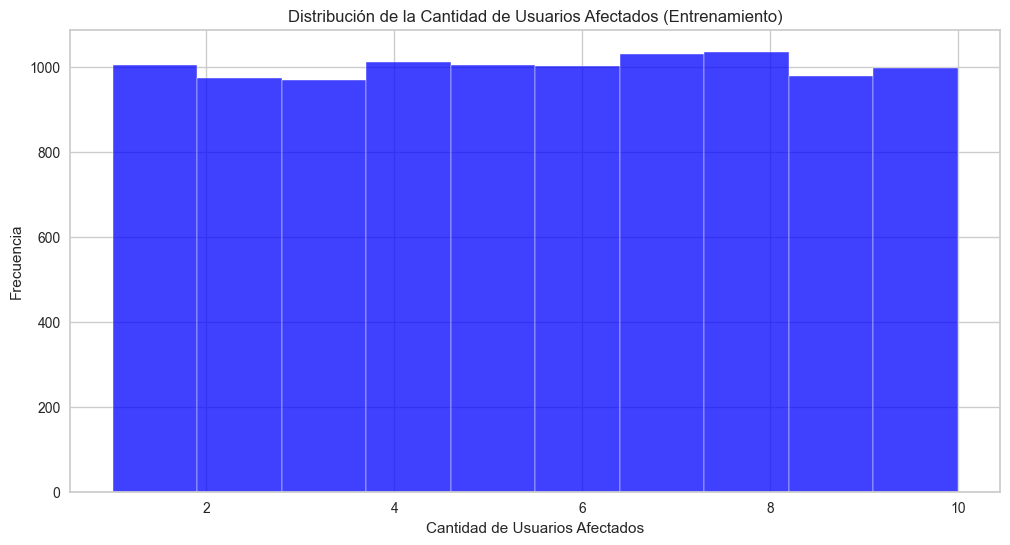

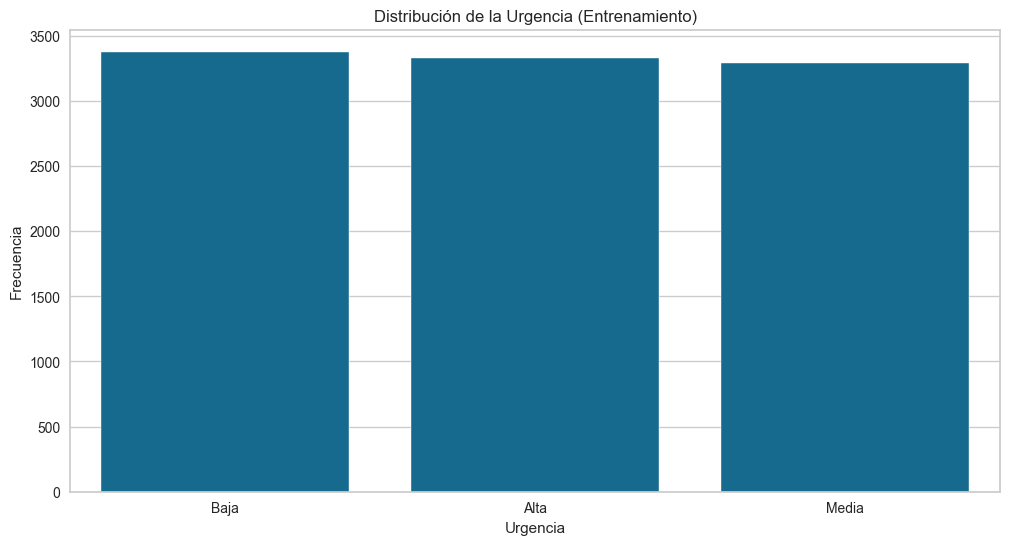

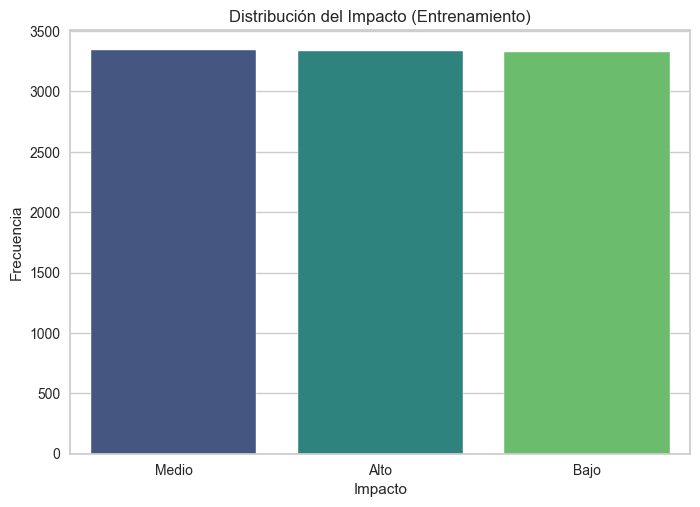

In [ ]:
# Visualización de distribuciones
plt.figure(figsize=(12, 6))
sns.histplot(data_train['Cantidad_Usuarios_Afectados'], kde=False, bins=10, color='blue')
plt.title("Distribución de la Cantidad de Usuarios Afectados (Entrenamiento)")
plt.xlabel("Cantidad de Usuarios Afectados")
plt.ylabel("Frecuencia")
plt.show()

# Conteo de categorías en 'Urgencia' y 'Impacto'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_train, x='Urgencia', order=data_train['Urgencia'].value_counts().index)
plt.title("Distribución de la Urgencia (Entrenamiento)")
plt.xlabel("Urgencia")
plt.ylabel("Frecuencia")
plt.show()

sns.countplot(data=data_train, x='Impacto', order=data_train['Impacto'].value_counts().index, palette='viridis')
plt.title("Distribución del Impacto (Entrenamiento)")
plt.xlabel("Impacto")
plt.ylabel("Frecuencia")
plt.show()

## 2. Preprocesamiento y Selección de Características
Este capítulo incluye el preprocesamiento y la selección de características, pero ahora vamos a manejar correctamente la columna Texto_Descripcion.

### 2.1 Limpieza de Datos

No cambia mucho aquí excepto que no eliminaremos Texto_Descripcion, sino que la reservamos para procesamiento de texto.

Acciones en esta sección:
- Eliminar columnas irrelevantes (datos personales que no aportan al modelo).
- Manejar valores faltantes para evitar problemas durante el entrenamiento. datos de entrenamiento.


In [ ]:
# Eliminar columnas irrelevantes
irrelevant_columns = ['Nombres', 'Apellidos', 'Documento_ID', 'Correo_Electronico', 'Direccion', 'Telefono_Contacto']
data_train_cleaned = data_train.drop(columns=irrelevant_columns)
data_test_cleaned = data_test.drop(columns=irrelevant_columns)

# Mostrar las primeras filas de los datasets limpios
print("\nPrimeras filas del dataset de entrenamiento (limpio):")
display(data_train_cleaned.head())

print("\nPrimeras filas del dataset de prueba (limpio):")
display(data_test_cleaned.head())


Primeras filas del dataset de entrenamiento (limpio):


,Tipo_Aplicacion,Aplicacion_Afectada,Cantidad_Usuarios_Afectados,Ultima_Actividad,Usuario_Compañero,Cambio_Contrato,Error_Reportado,URL_Ingreso,Texto_Descripcion,Urgencia,Impacto,Ambiente,Incidente_Reabierto,Tiempo_Resolucion,Centro_Desarrollo,Grupo_Asignacion,Target
0,DESKTOP,PORTALES ARL,4,2024-05-03,Credenciales de compañero,No,¡Ups! Lo sentimos,https://ventas.segurosbolivar.com,El módulo contable presenta discrepancias en l...,Alta,Medio,Desarrollo,No,19.75,Sistemas Contables,Atención al Cliente,Sistemas Contables - Atención al Cliente
1,APP_WEB,GESTIÓN CLIENTES,4,2024-02-09,Propias,No,No se puede procesar,https://clientes.segurosbolivar.com/login,Los usuarios enfrentan inconvenientes al carga...,Media,Alto,Desarrollo,Sí,16.40,Gestión de Clientes,Fábrica Desarrollo Core,Gestión de Clientes - Fábrica Desarrollo Core
2,APP_WEB,GESTIÓN CLIENTES,9,2024-08-27,Propias,Sí,Error 404,https://portal.segurosbolivar.com,El módulo contable presenta discrepancias en l...,Media,Alto,QA,Sí,10.90,Sistemas Contables,Atención al Cliente,Sistemas Contables - Atención al Cliente
3,DESKTOP,PORTALES ARL,6,2024-01-31,Credenciales de compañero,Sí,Error 404,https://ventas.segurosbolivar.com,Los usuarios enfrentan inconvenientes al carga...,Baja,Alto,QA,No,11.60,Gestión de Clientes,Fábrica Desarrollo Core,Gestión de Clientes - Fábrica Desarrollo Core
4,APP_WEB,VENTAS ONLINE,5,2024-06-05,Propias,No,¡Ups! Lo sentimos,https://clientes.segurosbolivar.com/login,Los usuarios enfrentan inconvenientes al carga...,Alta,Medio,Producción,No,27.31,Gestión de Clientes,Atención al Cliente,Gestión de Clientes - Atención al Cliente



Primeras filas del dataset de prueba (limpio):


,Tipo_Aplicacion,Aplicacion_Afectada,Cantidad_Usuarios_Afectados,Ultima_Actividad,Usuario_Compañero,Cambio_Contrato,Error_Reportado,URL_Ingreso,Texto_Descripcion,Urgencia,Impacto,Ambiente,Incidente_Reabierto,Tiempo_Resolucion,Centro_Desarrollo,Grupo_Asignacion,Target
0,APP_WEB,SISTEMA CONTABLE,4,2024-10-16,Propias,No,Tiempo de espera agotado,https://clientes.segurosbolivar.com/login,Se han detectado problemas de acceso y tiempos...,Media,Alto,Desarrollo,Sí,11.24,Plataformas Online,Infraestructura TI,Plataformas Online - Infraestructura TI
1,DESKTOP,SISTEMA CONTABLE,3,2024-03-17,Credenciales de compañero,Sí,¡Ups! Lo sentimos,https://portal.segurosbolivar.com,El módulo contable presenta discrepancias en l...,Baja,Medio,QA,No,11.30,Sistemas Contables,Atención al Cliente,Sistemas Contables - Atención al Cliente
2,APP_MÓVIL,VENTAS ONLINE,4,2024-11-18,Credenciales de compañero,Sí,Error 404,https://ventas.segurosbolivar.com,El módulo contable presenta discrepancias en l...,Baja,Medio,QA,Sí,3.28,Sistemas Contables,Infraestructura TI,Sistemas Contables - Infraestructura TI
3,APP_MÓVIL,SISTEMA CONTABLE,3,2024-06-07,Propias,Sí,Error 404,https://clientes.segurosbolivar.com/login,El módulo contable presenta discrepancias en l...,Media,Bajo,Desarrollo,No,1.87,Sistemas Contables,Infraestructura TI,Sistemas Contables - Infraestructura TI
4,APP_WEB,PORTALES ARL,4,2024-08-27,Credenciales de compañero,No,No se puede procesar,https://clientes.segurosbolivar.com/login,Se han detectado problemas de acceso y tiempos...,Media,Bajo,Desarrollo,Sí,18.81,Plataformas Online,Fábrica Desarrollo Core,Plataformas Online - Fábrica Desarrollo Core


### 2.2 Procesamiento de Texto
La columna Texto_Descripcion será procesada con técnicas de NLP para extraer características útiles:

Pasos:
- Limpieza de texto: Eliminación de caracteres especiales, tokenización, y stopwords.
- Vectorización: Usaremos TF-IDF para transformar el texto en una representación numérica.

In [ ]:
# Función para limpiar texto
def clean_text(text):
    # Eliminar caracteres especiales y convertir a minúsculas
    text = re.sub(r"[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s]", "", text).lower()
    # Tokenización y eliminación de stopwords
    words = text.split()
    words = [word for word in words if word not in spanish_stopwords]
    return " ".join(words)

# Limpiar texto en ambas datasets
data_train_cleaned['Texto_Descripcion'] = data_train_cleaned['Texto_Descripcion'].apply(clean_text)
data_test_cleaned['Texto_Descripcion'] = data_test_cleaned['Texto_Descripcion'].apply(clean_text)

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer(max_features=500)  # Limitamos a las 500 palabras más frecuentes
text_features_train = vectorizer.fit_transform(data_train_cleaned['Texto_Descripcion']).toarray()
text_features_test = vectorizer.transform(data_test_cleaned['Texto_Descripcion']).toarray()

In [ ]:
print("\nTF-IDF Vectorizer: Primeras características extraídas del texto (Entrenamiento):")
print(pd.DataFrame(text_features_train, columns=vectorizer.get_feature_names_out()).head())


TF-IDF Vectorizer: Primeras características extraídas del texto (Entrenamiento):
   acceso  actualiza  administrativos  afectando  alto  aplicación  atención  \
0     0.0   0.000000         0.239387   0.160615   0.0    0.000000  0.000000   
1     0.0   0.211061         0.000000   0.000000   0.0    0.211061  0.211061   
2     0.0   0.000000         0.239387   0.160615   0.0    0.000000  0.000000   
3     0.0   0.211061         0.000000   0.000000   0.0    0.211061  0.211061   
4     0.0   0.211061         0.000000   0.000000   0.0    0.211061  0.211061   

   auditoría  balances  carga  ...  relacionadas  reportes  respuestas  \
0   0.239387  0.239387    0.0  ...      0.000000  0.239387    0.000000   
1   0.000000  0.000000    0.0  ...      0.211061  0.000000    0.211061   
2   0.239387  0.239387    0.0  ...      0.000000  0.239387    0.000000   
3   0.000000  0.000000    0.0  ...      0.211061  0.000000    0.211061   
4   0.000000  0.000000    0.0  ...      0.211061  0.000000    0.211

### 2.3 Complementar el Datraframe con las Características de Texto

Añadir las características extraídas del texto al dataset principal.

In [ ]:
# Añadir características de texto al dataset principal
text_columns = vectorizer.get_feature_names_out()
text_features_train_df = pd.DataFrame(text_features_train, columns=text_columns)
text_features_test_df = pd.DataFrame(text_features_test, columns=text_columns)

data_train_cleaned = pd.concat([data_train_cleaned.reset_index(drop=True), text_features_train_df], axis=1)
data_test_cleaned = pd.concat([data_test_cleaned.reset_index(drop=True), text_features_test_df], axis=1)

# Mostar las primeras filas del dataset de entrenamiento con características de texto
print("\nPrimeras filas del dataset de entrenamiento con características de texto:")
display(data_train_cleaned.head())

# Mostrar las primeras filas del dataset de prueba con características de texto
print("\nPrimeras filas del dataset de prueba con características de texto:")
display(data_test_cleaned.head())


Primeras filas del dataset de entrenamiento con características de texto:


,Tipo_Aplicacion,Aplicacion_Afectada,Cantidad_Usuarios_Afectados,Ultima_Actividad,Usuario_Compañero,Cambio_Contrato,Error_Reportado,URL_Ingreso,Texto_Descripcion,Urgencia,...,relacionadas,reportes,respuestas,sistema,tiempos,transacciones,tráfico,usuario,usuarios,ventas
0,DESKTOP,PORTALES ARL,4,2024-05-03,Credenciales de compañero,No,¡Ups! Lo sentimos,https://ventas.segurosbolivar.com,módulo contable presenta discrepancias balance...,Alta,...,0.000000,0.239387,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,APP_WEB,GESTIÓN CLIENTES,4,2024-02-09,Propias,No,No se puede procesar,https://clientes.segurosbolivar.com/login,usuarios enfrentan inconvenientes cargar datos...,Media,...,0.211061,0.000000,0.211061,0.211061,0.0,0.0,0.0,0.0,0.141329,0.0
2,APP_WEB,GESTIÓN CLIENTES,9,2024-08-27,Propias,Sí,Error 404,https://portal.segurosbolivar.com,módulo contable presenta discrepancias balance...,Media,...,0.000000,0.239387,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,DESKTOP,PORTALES ARL,6,2024-01-31,Credenciales de compañero,Sí,Error 404,https://ventas.segurosbolivar.com,usuarios enfrentan inconvenientes cargar datos...,Baja,...,0.211061,0.000000,0.211061,0.211061,0.0,0.0,0.0,0.0,0.141329,0.0
4,APP_WEB,VENTAS ONLINE,5,2024-06-05,Propias,No,¡Ups! Lo sentimos,https://clientes.segurosbolivar.com/login,usuarios enfrentan inconvenientes cargar datos...,Alta,...,0.211061,0.000000,0.211061,0.211061,0.0,0.0,0.0,0.0,0.141329,0.0



Primeras filas del dataset de prueba con características de texto:


,Tipo_Aplicacion,Aplicacion_Afectada,Cantidad_Usuarios_Afectados,Ultima_Actividad,Usuario_Compañero,Cambio_Contrato,Error_Reportado,URL_Ingreso,Texto_Descripcion,Urgencia,...,relacionadas,reportes,respuestas,sistema,tiempos,transacciones,tráfico,usuario,usuarios,ventas
0,APP_WEB,SISTEMA CONTABLE,4,2024-10-16,Propias,No,Tiempo de espera agotado,https://clientes.segurosbolivar.com/login,detectado problemas acceso tiempos carga prolo...,Media,...,0.0,0.000000,0.0,0.0,0.22419,0.22419,0.22419,0.22419,0.150508,0.22419
1,DESKTOP,SISTEMA CONTABLE,3,2024-03-17,Credenciales de compañero,Sí,¡Ups! Lo sentimos,https://portal.segurosbolivar.com,módulo contable presenta discrepancias balance...,Baja,...,0.0,0.239387,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000
2,APP_MÓVIL,VENTAS ONLINE,4,2024-11-18,Credenciales de compañero,Sí,Error 404,https://ventas.segurosbolivar.com,módulo contable presenta discrepancias balance...,Baja,...,0.0,0.239387,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000
3,APP_MÓVIL,SISTEMA CONTABLE,3,2024-06-07,Propias,Sí,Error 404,https://clientes.segurosbolivar.com/login,módulo contable presenta discrepancias balance...,Media,...,0.0,0.239387,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000
4,APP_WEB,PORTALES ARL,4,2024-08-27,Credenciales de compañero,No,No se puede procesar,https://clientes.segurosbolivar.com/login,detectado problemas acceso tiempos carga prolo...,Media,...,0.0,0.000000,0.0,0.0,0.22419,0.22419,0.22419,0.22419,0.150508,0.22419


## 3. Configuración de PyCaret para Clasificación

En este capítulo, configuramos el entorno de PyCaret para comenzar con el modelado de clasificación. Esto incluye la inicialización de la función setup, que prepara los datos para el entrenamiento y crea una tubería de transformación automática.

### 3.1 Configuración del entorno

Acciones en esta sección:
- Definir el dataset de entrada (ya procesado en capítulos anteriores).
- Especificar la variable objetivo (en este caso, la columna Target).
- Configurar las opciones de transformación y preprocesamiento de PyCaret, como normalización, imputación de valores faltantes, y codificación de variables categóricas.



In [ ]:
# Configuración de PyCaret
print("\nConfigurando PyCaret para clasificación...")
clf_setup = setup(data=data_train_cleaned, target='Target', session_id=123)


Configurando PyCaret para clasificación...


,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"Gestión de Clientes - Atención al Cliente: 0, Gestión de Clientes - Fábrica Desarrollo Core: 1, Gestión de Clientes - Infraestructura TI: 2, Plataformas Online - Atención al Cliente: 3, Plataformas Online - Fábrica Desarrollo Core: 4, Plataformas Online - Infraestructura TI: 5, Sistemas Contables - Atención al Cliente: 6, Sistemas Contables - Fábrica Desarrollo Core: 7, Sistemas Contables - Infraestructura TI: 8"
4,Original data shape,"(10000, 74)"
5,Transformed data shape,"(10000, 96)"
6,Transformed train set shape,"(7000, 96)"
7,Transformed test set shape,"(3000, 96)"
8,Numeric features,59
9,Categorical features,14


### 3.2 Exploración de los Modelos Disponibles
PyCaret incluye múltiples algoritmos de clasificación que podemos probar rápidamente. En esta etapa, listamos los modelos disponibles y nos preparamos para compararlos.

In [ ]:
# Listar modelos disponibles
print("\nModelos de clasificación disponibles en PyCaret:")
display(models())


Modelos de clasificación disponibles en PyCaret:


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### 3.3 Comparación Inicial de Modelos

Usamos la función compare_models para entrenar múltiples algoritmos y evaluar su desempeño utilizando métricas estándar. Esto nos ayuda a identificar los modelos con mejor rendimiento.

In [ ]:
# Comparación de modelos
print("\nComparando modelos de clasificación...")
best_models = compare_models(n_select=5)

print("\nModelos con mejor desempeño:")
display(best_models)


Comparando modelos de clasificación...


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:29:55
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6140
nb,Naive Bayes,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1020
dt,Decision Tree Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1170
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1050
rf,Random Forest Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2060
qda,Quadratic Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1080
gbc,Gradient Boosting Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.2880
et,Extra Trees Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2180
xgboost,Extreme Gradient Boosting,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3760
lightgbm,Light Gradient Boosting Machine,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7560



Modelos con mejor desempeño:
[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), GaussianNB(priors=None, var_smoothing=1e-09), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best'), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001), RandomForestClassifier(bootstra

## 4. Selección y Creación del Modelo Principal

En este capítulo, seleccionaremos un modelo principal para su ajuste y optimización. Este modelo servirá como base para futuras mejoras y ajustes.

### 4.1 Selección del Modelo Principal

De los modelos seleccionados, elegiremos uno como el modelo principal para su ajuste y validación detallada. Este modelo se utilizará como base para optimizaciones posteriores.

Acciones en esta sección:
- Establecer el modelo principal.
- Mostrar las métricas de evaluación del modelo seleccionado.

In [ ]:
# Entrenar el modelo KNN
principal_model = create_model('knn')

print("\nModelo principal:")
display(principal_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:33:05
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8029,0.0000,0.8029,0.8179,0.8025,0.7783,0.7803
1,0.8071,0.0000,0.8071,0.8205,0.8080,0.7831,0.7845
2,0.8114,0.0000,0.8114,0.8151,0.8117,0.7879,0.7882
3,0.8243,0.0000,0.8243,0.8312,0.8235,0.8023,0.8033
4,0.8343,0.0000,0.8343,0.8408,0.8342,0.8136,0.8143
5,0.8000,0.0000,0.8000,0.8047,0.7984,0.7750,0.7759
6,0.8343,0.0000,0.8343,0.8430,0.8344,0.8136,0.8146
7,0.8100,0.0000,0.8100,0.8181,0.8099,0.7863,0.7874
8,0.8043,0.0000,0.8043,0.8162,0.8045,0.7799,0.7812



Modelo principal:


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

## 5. Ajuste y Optimización de Modelos
En este capítulo, realizaremos el ajuste y la optimización de los hiperparámetros del modelo principal seleccionado. Esto nos permitirá mejorar el desempeño del modelo al ajustar los parámetros clave según las características de los datos.

### 5.1 Ajuste del Modelo Principal

El ajuste del modelo principal se realiza mediante la función tune_model(), que utiliza técnicas de optimización para encontrar la mejor combinación de hiperparámetros.

Acciones en esta sección:
- Ajustar el modelo principal.
- Comparar el desempeño antes y después del ajuste.



In [ ]:
# Ajuste del modelo principal
print("\nAjustando el modelo principal...")
tuned_model = tune_model(principal_model)

print("\nModelo ajustado:")
display(tuned_model)


Ajustando el modelo principal...


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:33:07
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9814,0.0000,0.9814,0.9818,0.9814,0.9791,0.9792
1,0.9757,0.0000,0.9757,0.9758,0.9757,0.9727,0.9727
2,0.9829,0.0000,0.9829,0.9830,0.9828,0.9807,0.9807
3,0.9829,0.0000,0.9829,0.9830,0.9828,0.9807,0.9807
4,0.9814,0.0000,0.9814,0.9815,0.9814,0.9791,0.9791
5,0.9814,0.0000,0.9814,0.9820,0.9814,0.9791,0.9792
6,0.9786,0.0000,0.9786,0.9787,0.9786,0.9759,0.9759
7,0.9886,0.0000,0.9886,0.9888,0.9886,0.9871,0.9872
8,0.9686,0.0000,0.9686,0.9690,0.9685,0.9646,0.9647


Fitting 10 folds for each of 10 candidates, totalling 100 fits

Modelo ajustado:


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

### 5.2 Evaluación Detallada del Modelo

Una vez ajustado el modelo, evaluaremos su desempeño mediante gráficos y métricas específicas. Esto incluye verificar su robustez en datos desbalanceados y su capacidad de generalización.

Acciones en esta sección:
- Evaluar el modelo ajustado mediante visualizaciones adicionales.
- Interpretar las métricas clave.

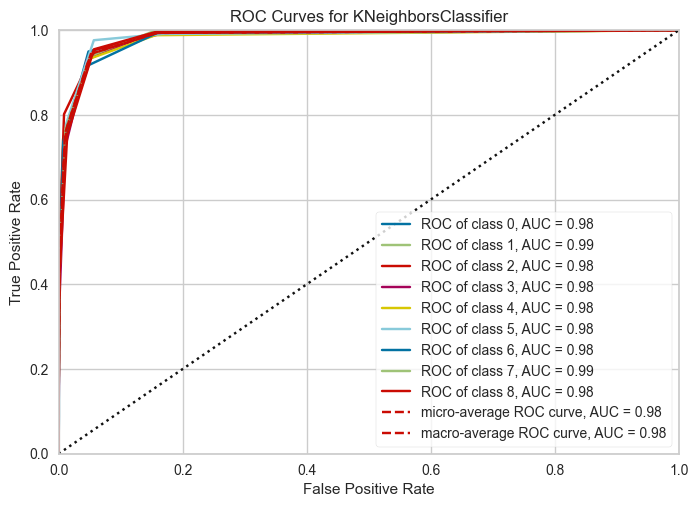

In [ ]:
# Análisis de la curva ROC del modelo principal
plot_model(principal_model, plot = 'auc')

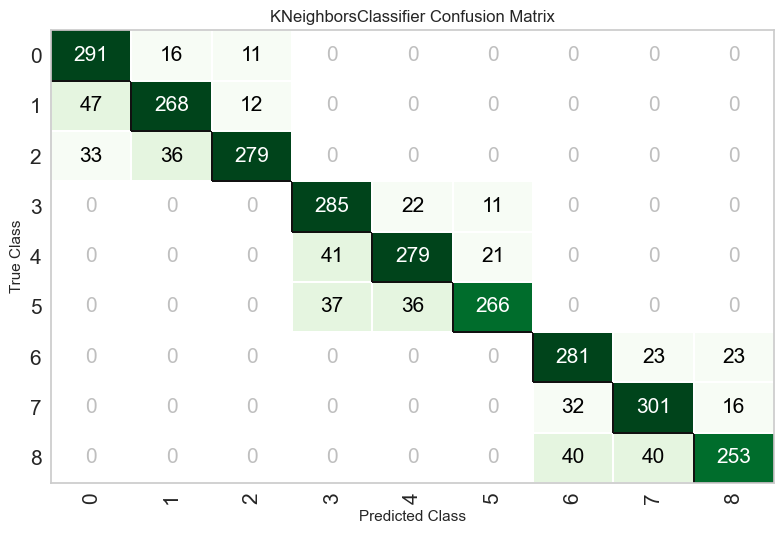

In [ ]:
# Análisis de la matriz de confusion del modelo principal
plot_model(principal_model, plot = 'confusion_matrix')

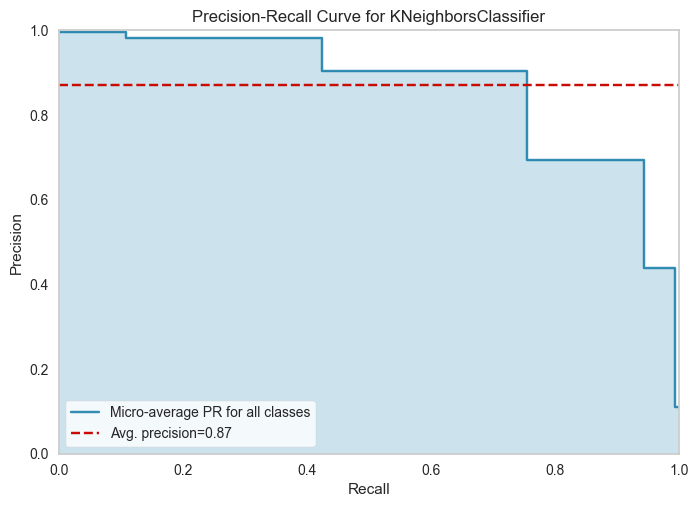

In [ ]:
# Análisis de la curva de precision-recall del modelo principal
plot_model(principal_model, plot = 'pr')

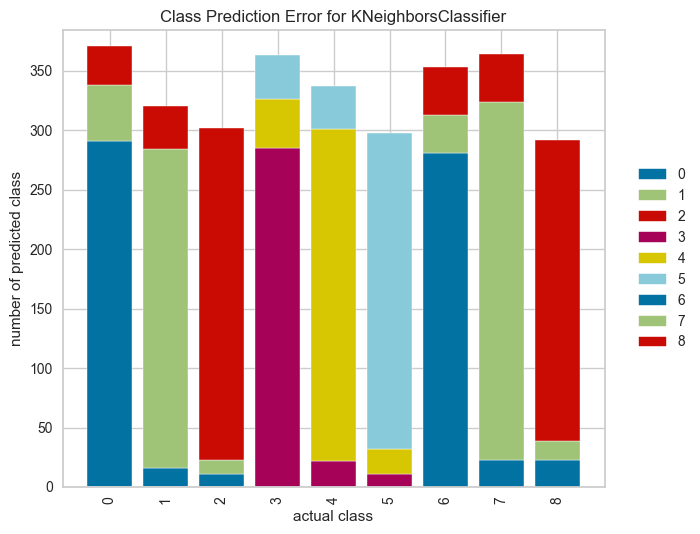

In [ ]:
# Análisis de la curva de precision-recall del modelo principal
plot_model(principal_model, plot = 'error')

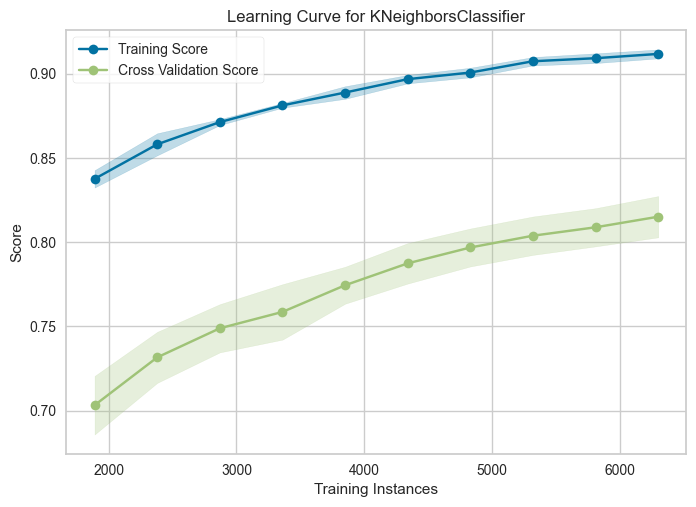

In [ ]:
# Análisis de la curva de entrenamiento del modelo principal
plot_model(principal_model, plot = 'learning')

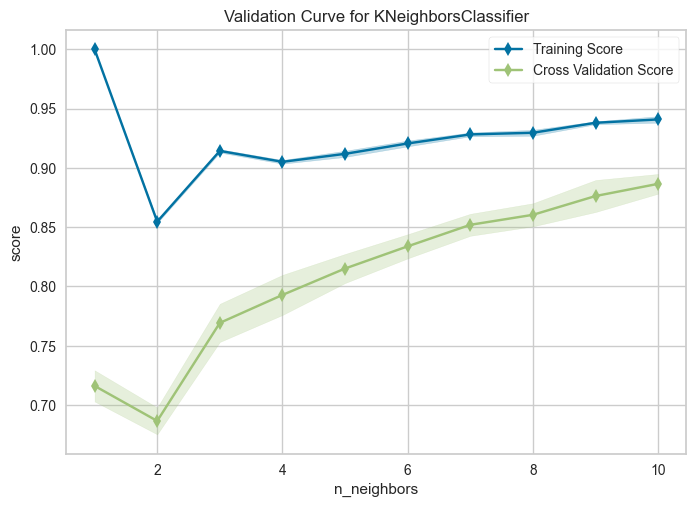

In [ ]:
# Análisis de la curva de validación del modelo principal
plot_model(principal_model, plot = 'vc')

## 6. Evaluación en Datos de Prueba

6.1 Evaluación del Modelo en Datos de Prueba
En esta etapa, evaluaremos el modelo ajustado utilizando el conjunto de datos de prueba. Esto nos permitirá medir el desempeño del modelo al predecir datos que no se utilizaron durante el entrenamiento. Analizaremos las predicciones y generaremos las métricas clave para validar la eficacia del modelo.

Acciones:
- Aplicar el modelo a los datos de prueba.
- Generar predicciones y probabilidades.
- Evaluar métricas como precisión, recall y F1-score.
- Visualizar el desempeño con una matriz de confusión.

In [ ]:
# Aplicar el modelo ajustado a los datos de prueba
print("\nEvaluando el modelo ajustado en el conjunto de prueba...")

# Generar predicciones en el conjunto de prueba
predictions = predict_model(principal_model, data=data_test_cleaned)


Evaluando el modelo ajustado en el conjunto de prueba...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8310,0.9815,0.8310,0.8371,0.8310,0.8099,0.8106


In [ ]:
# Mostrar las primeras filas con predicciones
print("\nPrimeras filas del conjunto de prueba con predicciones:")
display(predictions.head())


Primeras filas del conjunto de prueba con predicciones:


,Tipo_Aplicacion,Aplicacion_Afectada,Cantidad_Usuarios_Afectados,Ultima_Actividad,Usuario_Compañero,Cambio_Contrato,Error_Reportado,URL_Ingreso,Texto_Descripcion,Urgencia,...,sistema,tiempos,transacciones,tráfico,usuario,usuarios,ventas,Target,prediction_label,prediction_score
0,APP_WEB,SISTEMA CONTABLE,4,2024-10-16,Propias,No,Tiempo de espera agotado,https://clientes.segurosbolivar.com/login,detectado problemas acceso tiempos carga prolo...,Media,...,0.0,0.22419,0.22419,0.22419,0.22419,0.150508,0.22419,Plataformas Online - Infraestructura TI,Plataformas Online - Atención al Cliente,0.4
1,DESKTOP,SISTEMA CONTABLE,3,2024-03-17,Credenciales de compañero,Sí,¡Ups! Lo sentimos,https://portal.segurosbolivar.com,módulo contable presenta discrepancias balance...,Baja,...,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,Sistemas Contables - Atención al Cliente,Sistemas Contables - Atención al Cliente,0.8
2,APP_MÓVIL,VENTAS ONLINE,4,2024-11-18,Credenciales de compañero,Sí,Error 404,https://ventas.segurosbolivar.com,módulo contable presenta discrepancias balance...,Baja,...,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,Sistemas Contables - Infraestructura TI,Sistemas Contables - Infraestructura TI,0.8
3,APP_MÓVIL,SISTEMA CONTABLE,3,2024-06-07,Propias,Sí,Error 404,https://clientes.segurosbolivar.com/login,módulo contable presenta discrepancias balance...,Media,...,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,Sistemas Contables - Infraestructura TI,Sistemas Contables - Atención al Cliente,0.6
4,APP_WEB,PORTALES ARL,4,2024-08-27,Credenciales de compañero,No,No se puede procesar,https://clientes.segurosbolivar.com/login,detectado problemas acceso tiempos carga prolo...,Media,...,0.0,0.22419,0.22419,0.22419,0.22419,0.150508,0.22419,Plataformas Online - Fábrica Desarrollo Core,Plataformas Online - Fábrica Desarrollo Core,0.6


In [ ]:
# Calcular métricas de evaluación
print("\nMétricas de evaluación en el conjunto de prueba:")
evaluation_metrics = pull()  # Obtiene las métricas generadas automáticamente
display(evaluation_metrics)


Métricas de evaluación en el conjunto de prueba:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.831,0.9815,0.831,0.8371,0.831,0.8099,0.8106



Métricas adicionales:


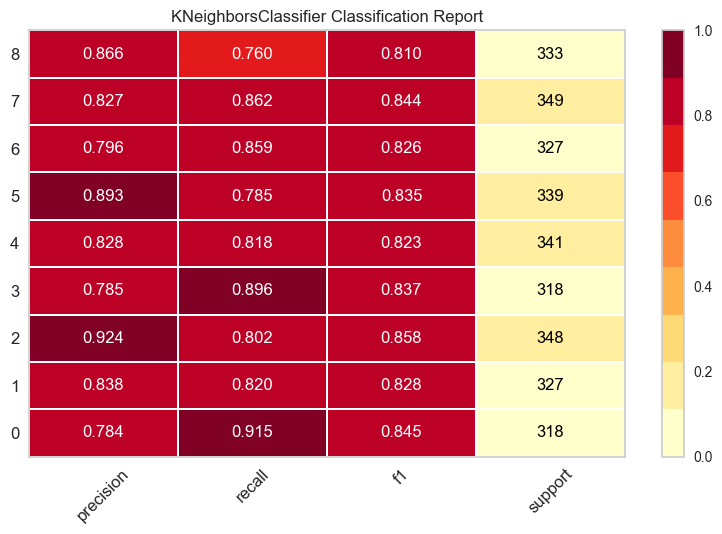

In [ ]:
# Métricas adicionales
print("\nMétricas adicionales:")
plot_model(principal_model, plot='class_report')

## 7. Guardado del Modelo Final

### 7.1 Guardar el Modelo Ajustado

En esta etapa, procederemos a guardar el modelo ajustado junto con su pipeline completo. Esto permitirá que el modelo pueda ser cargado y utilizado posteriormente en entornos de producción o para análisis adicionales.

Acciones:
- Guardar el modelo entrenado y ajustado.
- Guardar las configuraciones y transformaciones realizadas.
- Proporcionar una forma de cargar el modelo para futuras predicciones.

In [ ]:
# # Guardar el modelo ajustado
# print("\nGuardando el modelo final...")
#
# # Guardar modelo
# save_model(tuned_model, 'modelo_final_clasificacion')
#
# # Confirmación
# print("\nEl modelo ha sido guardado exitosamente como 'modelo_final_clasificacion.pkl'")